# Predicting Movie Earnings
    Thomas van der Molen
    S4-AI41

## Table of Contents
- [Version History](#Version-History)
- [Domain Understanding](#Domain-Understanding)  
  * [Introduction](#Introduction)
  * [Problem Statement](#Problem-Statement)
  * [Target Audience](#Target-Audience)
  * [Expert Domain Clarification](#Expert-Domain-Clarification)
- [Data Sourcing](#Data-Sourcing)
  * [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Analytic Approach](#Analytic-Approach)
- [Evaluation](#Evaluation)

In [1]:
%%html
<style>
table {float:left}
img {float:left}
</style>

## Version History
| Version | Date | Change |
| :---: | :--- | :--- |
| 1.0 | 17-02-2022 | Created document |
| 1.1 | 18-02-2022 | Started work on the introduction |
| 1.2 | 25-02-2022 | Added more structure based on SI lecture |
| 1.3 | 07-03-2022 | Converted document to markdown |

# Domain Understanding

### Introduction
As someone who enjoys watching movies, there often seems to be a polarizing difference between what movies perform well and which ones do not. With movies being [a billion-dollar industry](https://www.boxofficepro.com/mpa-2019-global-box-office-and-home-entertainment-surpasses-100-billion/), there seems to be a lot of risk and reward involved when investing and making movies. 
  
I am interested in finding possible patterns to predict how much a movie will earn in the box office compared to the amount of money spent on budget. This could give movie companies a clearer vision of how much they should spend for the best result, reducing the amount of risk taken when investing in movies with budgets of [100 million+ dollars](https://www.the-numbers.com/movie/budgets/all).

### Problem Statement
For this project I Will be trying to predict:  
*How much will a movie earn compared to its budget based on publicly available data.*

### Target Audience
There are a lot of different parties involved during the process of making a movie, for this reason there are many different groups that could benefit from the given predictions.  
  
The most obvious ones are the production and distribution companies such as:  
[Paramount Pictures Studios](http://www.paramountstudios.com/), [Warner Bros. Pictures](https://www.warnerbros.com/company/divisions/motion-pictures), [Sony Pictures](https://www.sonypictures.com/), [Lionsgate](https://www.lionsgate.com/), etc.  
  
Further from the actual production and distribution process are companies such as [Peacock Film Finance](https://peacockfilmfinance.com/), who as the name suggests help finance the production of movies.  
  
Besides these you could also include Bond companies, these companies are a form of insurance agency such as [Surety Bonds Direct](https://www.suretybondsdirect.com/).  
  
I am going to focus my domain on the production companies, because these are the companies that will originally set the budget and could use this prediction to get investments and get more people interested in their movie.

### Expert Domain Clarification
I have tried reaching out to several (smaller) movie production companies to try and get an interview with them such as [24fps productions](https://www.24fpsproductions.com/).\
Sadly, there has been no responses to my requests.

## Data Sourcing
One of the other reasons I chose to try and work with movies, is because movies seem to have a lot of public data attached to them for example, most movies share their box office revenue ([or are tracked by third parties](https://movies.stackexchange.com/questions/27777/why-are-box-office-numbers-made-public)) and in most cases movie budgets will also be provided. Other than this information such as the cast, genre, runtime, release date and critic scores are also widely available.  
  
For sourcing data there are a few well known sources to get large amounts of data from movies, such as [IMDb](https://www.imdb.com/), [TMDB](https://www.themoviedb.org/) and [Rotten Tomatoes](https://www.rottentomatoes.com/).

For my first iteration I have created a bot to go through the supplied API from TMDB and get all surface level information available.  
  
This system has been made in C# and can be found [here in my repository](https://github.com/Thomas-Molen/FHICT-S4-AI/tree/main/Challenge/TMDBScraper/TMDBScraper)

### Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

numpy version: 1.20.3
matplotlib version: 1.3.4


Info on full original dataset:  
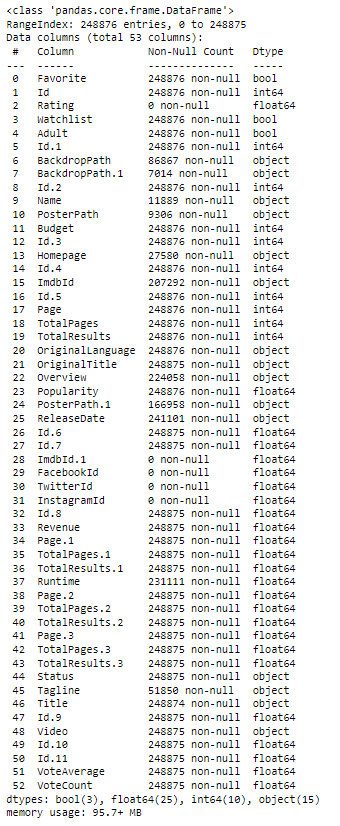

In [7]:
cols = ['Id.5', 'OriginalTitle', 'OriginalLanguage', 'Budget', 'Popularity', 'ReleaseDate', 'Revenue', 'Tagline', 'Title', 'Adult', 'Name', 'Status']
movies = pd.read_csv('movies.csv', usecols=cols)

Filter out all unnecessary columns

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248876 entries, 0 to 248875
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Adult             248876 non-null  bool   
 1   Name              11889 non-null   object 
 2   Budget            248876 non-null  int64  
 3   Id.5              248876 non-null  int64  
 4   OriginalLanguage  248876 non-null  object 
 5   OriginalTitle     248875 non-null  object 
 6   Popularity        248876 non-null  float64
 7   ReleaseDate       241101 non-null  object 
 8   Revenue           248875 non-null  float64
 9   Status            248875 non-null  object 
 10  Tagline           51850 non-null   object 
 11  Title             248874 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 21.1+ MB


In [9]:
# Easier view of NaN values
movies.isna().sum()

Adult                    0
Name                236987
Budget                   0
Id.5                     0
OriginalLanguage         0
OriginalTitle            1
Popularity               0
ReleaseDate           7775
Revenue                  1
Status                   1
Tagline             197026
Title                    2
dtype: int64

In [6]:
movies[(movies['OriginalTitle'].isna() | movies['Title'].isna())]

,Id,Adult,Name,Budget,OriginalLanguage,OriginalTitle,Popularity,ReleaseDate,Revenue,Status,Tagline,Title
164666,0,False,NaN,0,en,NaN,0.600,06/13/2014 00:00:00,0.0,Released,NaN,NaN
248875,0,False,NaN,0,ml,ലാവണ്ടര്‍,1.716,NaN,NaN,NaN,NaN,NaN


There seems to be one movie with not an original title or tile

## Analytic Approach

## Evaluation